# Report Convolutional Neuronal Network

# I. Get results

In [48]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [49]:
batches = [200,300,600]
epoches = [2,5,7,10]
optims = [0.001, 0.01, 0.1]
tests = [0.20, 0.30, 0.40]
col = ["green", "orange","blue","purple"]

In [ ]:
# Load file
df = pd.read_pickle('results_df_v6.pkl')
df.head(50)



##  Best accuracy:

In [51]:
# Get the best accuracy
index = df['Accuracies'].argmax()
print(df.iloc[index])

Epoches        7.000000e+00
Batchs         2.000000e+02
Accuracies     9.894000e+01
Test_size      4.000000e-01
Adam_coef      1.000000e-03
Loss           6.600000e-01
Timer          1.154717e+02
Mem_current    1.843806e+09
Mem_peak       3.133987e+09
Mem_diff       1.290181e+09
Name: 90, dtype: float64


# II. Epoch sizes

In [52]:
# Saved interesting datas for each epoch

# Create list
res_list = []
for epoch in epoches:
    
    acc = df.loc[df['Epoches'] == epoch]['Accuracies']
    timer = df.loc[df['Epoches'] == epoch]['Timer']
    mem = df.loc[df['Epoches'] == epoch]['Mem_diff']
    loss = df.loc[df['Epoches'] == epoch]['Loss']
    
    # calculate mean, max and min
    to_append = [epoch,
                 float('{:.2f}'.format(acc.mean())), acc.max(), acc.min(),
                 float('{:.2f}'.format(timer.mean())), timer.max(), timer.min(),
                 float('{:.2f}'.format(mem.mean())), mem.max(), mem.min(),
                float('{:.2f}'.format(loss.mean())), loss.max(), loss.min()]
    res_list.append(to_append)


# Create DataFrame
epoch_df = pd.DataFrame(res_list, columns=['Epoches',
                                           'Acc_mean','Acc_max','Acc_min',
                                           'Timer_mean','Timer_max','Timer_min',
                                           'Mem_mean','Mem_max','Mem_min',
                                           'Loss_mean','Loss_max','Loss_min'])

epoch_df.head()

,Epoches,Acc_mean,Acc_max,Acc_min,Timer_mean,Timer_max,Timer_min,Mem_mean,Mem_max,Mem_min,Loss_mean,Loss_max,Loss_min
0,2,82.40,95.96,75.0,92.88,314.6221,34.4622,8.601773e+08,1.290271e+09,61319.0,16.15,94.42,3.60
1,5,86.96,98.12,75.0,118.91,259.5939,67.7996,8.601958e+08,1.290228e+09,162140.0,11.89,103.41,2.00
2,7,85.82,98.94,75.0,166.87,300.5686,107.9644,8.601938e+08,1.290238e+09,169451.0,9.15,27.58,0.51
3,10,86.96,98.67,75.0,213.26,408.4044,138.0290,8.601928e+08,1.290291e+09,183197.0,8.19,27.00,0.30


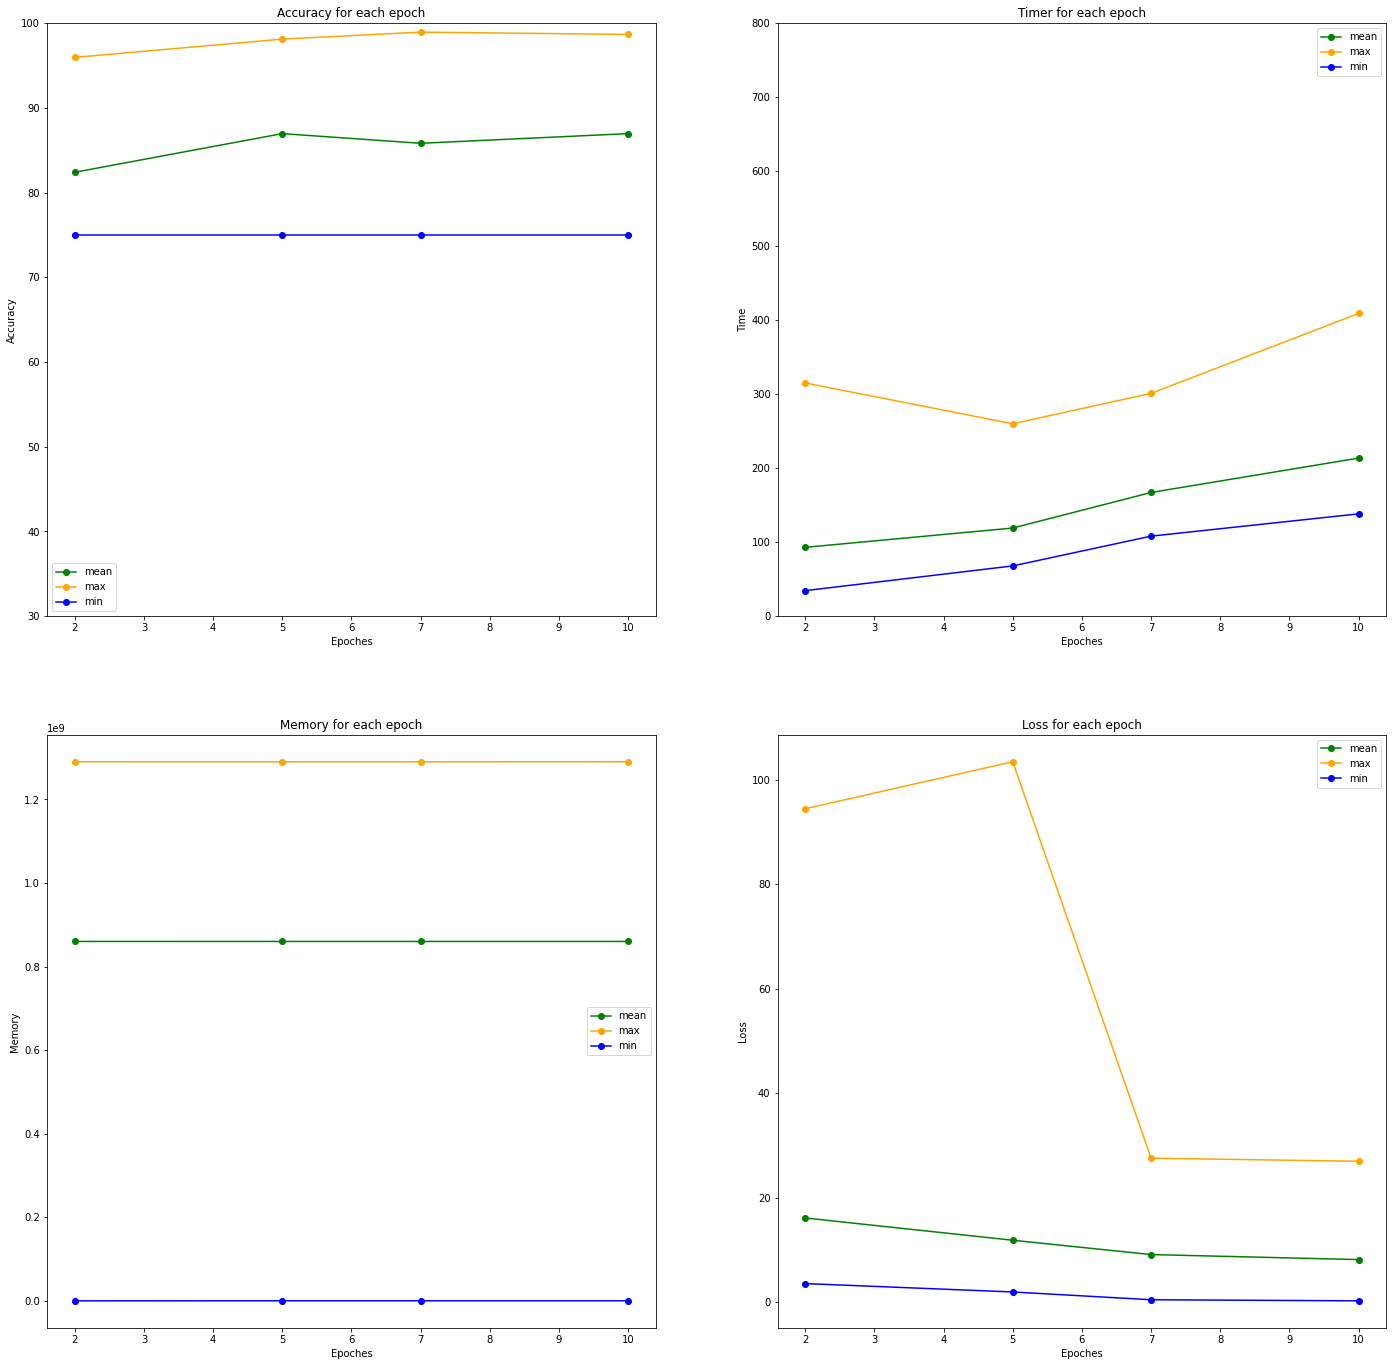

In [53]:
# Display each epoch performance with batch take the best accuracy 
# Create figure:
labels = ['mean','max','min']
fig, axes = plt.subplots(2,2,figsize=(24,24))
# Define xlabels and ylabels
# Accurancies
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_xlabel('Epoch')
axes[0,0].set_title('Accuracy for each epoch')
axes[0,0].set_ylim([30,100])


# Timer
axes[0,1].set_title('Timer for each epoch')
axes[0,1].set_ylabel('Time')
axes[0,1].set_xlabel('Epoch')
# limit y axis
axes[0,1].set_ylim([0,800])
# Memory
axes[1,0].set_title('Memory for each epoch')
axes[1,0].set_ylabel('Memory')
axes[1,0].set_xlabel('Epoch')

# Loss
axes[1,1].set_title('Loss for each epoch')
axes[1,1].set_ylabel('Loss')
axes[1,1].set_xlabel('Epoch')

# Define size of fig
# plot mean max min of acc
for index in range(3):
    epoch_df.plot(ax = axes[0,0], x='Epoches', y='Acc_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))
    epoch_df.plot(ax = axes[0,1], x='Epoches', y='Timer_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))
    epoch_df.plot(ax = axes[1,0], x='Epoches', y='Mem_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))
    epoch_df.plot(ax = axes[1,1], x='Epoches', y='Loss_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))




# Notes:
## Accuracy figure:
Accuracy never goes down under 75%. But 75% means the model doesn't recognize ships (1/4 pictures in input is a ship). The model just says that all pictures belongs to the class "no-ships".



# III. Batch sizes (epoch = 7)

In [54]:
# Saved interesting datas for each batch

# Create list
res_list = []
# epoch = 7
df_reduce = df.loc[df['Epoches'] == 7]
for batch in batches:
    
    acc = df_reduce.loc[df_reduce['Batchs'] == batch]['Accuracies']
    timer = df_reduce.loc[df_reduce['Batchs'] == batch]['Timer']
    mem = df_reduce.loc[df_reduce['Batchs'] == batch]['Mem_diff']
    loss = df_reduce.loc[df_reduce['Batchs'] == batch]['Loss']
    
    # calculate mean, max and min
    to_append = [batch,
                 float('{:.2f}'.format(acc.mean())), acc.max(), acc.min(),
                 float('{:.2f}'.format(timer.mean())), timer.max(), timer.min(),
                 float('{:.2f}'.format(mem.mean())), mem.max(), mem.min(),
                float('{:.2f}'.format(loss.mean())), loss.max(), loss.min()]
    res_list.append(to_append)


# Create DataFrame
batch_df = pd.DataFrame(res_list, columns=['Batchs',
                                           'Acc_mean','Acc_max','Acc_min',
                                           'Timer_mean','Timer_max','Timer_min',
                                           'Mem_mean','Mem_max','Mem_min',
                                           'Loss_mean','Loss_max','Loss_min'])
batch_df

,Batchs,Acc_mean,Acc_max,Acc_min,Timer_mean,Timer_max,Timer_min,Mem_mean,Mem_max,Mem_min,Loss_mean,Loss_max,Loss_min
0,200,85.22,98.94,75.0,121.12,134.2060,107.9644,8.601974e+08,1.290238e+09,174199.0,14.43,27.58,0.66
1,300,87.52,98.56,75.0,158.17,198.0848,114.7285,8.601835e+08,1.290204e+09,169451.0,8.00,18.00,0.51
2,600,84.73,98.25,75.0,221.34,300.5686,128.5208,8.602006e+08,1.290219e+09,185198.0,5.02,9.03,0.73


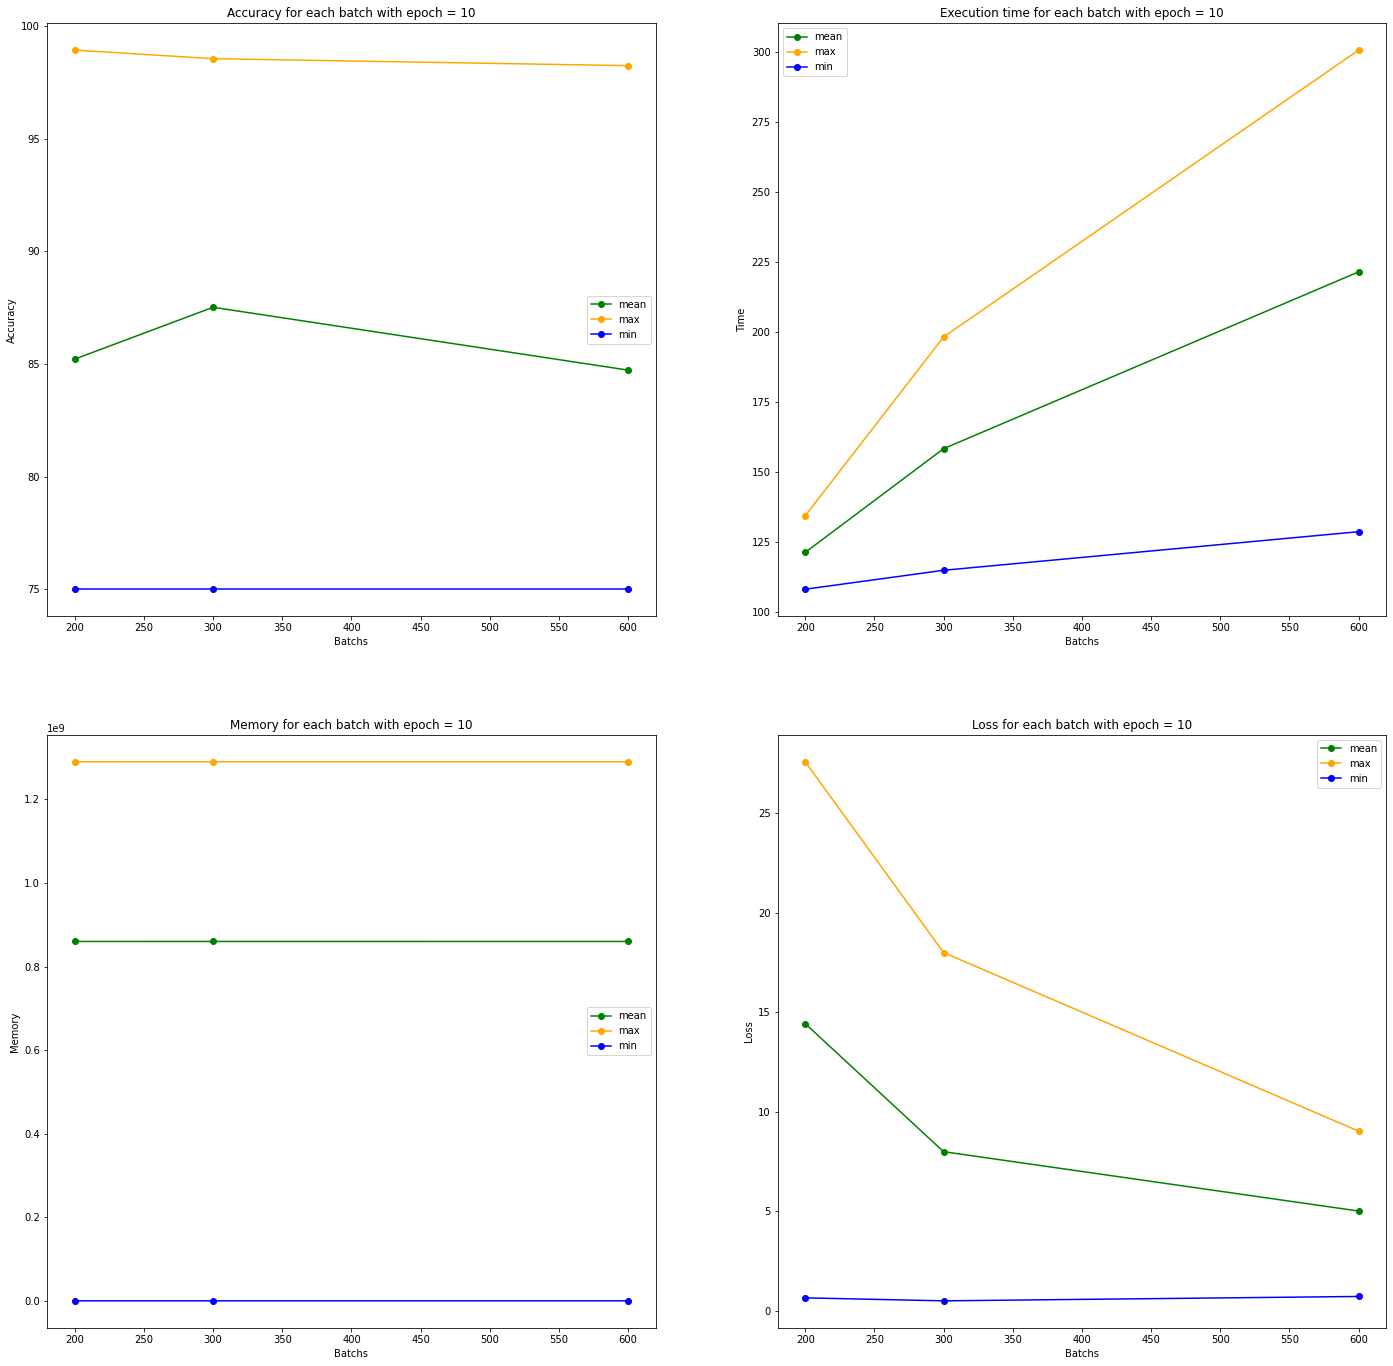

In [55]:
# Display each epoch performance with batch take the best accuracy 
# Create figure:
labels = ['mean','max','min']
fig, axes = plt.subplots(2,2,figsize=(24,24))

# Define xlabels and ylabels
# Accurancies
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_xlabel('Batch')
axes[0,0].set_title('Accuracy for each batch with epoch = 10')
# axes[0,0].set_ylim([30,100])


# Timer
axes[0,1].set_title('Execution time for each batch with epoch = 10')
axes[0,1].set_ylabel('Time')
axes[0,1].set_xlabel('Batch')
# limit y axis
#axes[0,1].set_ylim([0,800])
# Memory
axes[1,0].set_title('Memory for each batch with epoch = 10')
axes[1,0].set_ylabel('Memory')
#axes[1,0].set_xlabel('Batches')

# Loss
axes[1,1].set_title('Loss for each batch with epoch = 10')
axes[1,1].set_ylabel('Loss')
axes[1,1].set_xlabel('Batch')

# Define size of fig
# plot mean max min of acc
for index in range(3):
    batch_df.plot(ax = axes[0,0], x='Batchs', y='Acc_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))
    batch_df.plot(ax = axes[0,1], x='Batchs', y='Timer_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))
    batch_df.plot(ax = axes[1,0], x='Batchs', y='Mem_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))
    batch_df.plot(ax = axes[1,1], x='Batchs', y='Loss_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))



# IV. Test sizes (epoch = 7 batch = 200)

In [56]:
# Saved interesting datas for each test sizes

# Create list
res_list = []
# epoch = 10 & batch = 100
df_reduce = df.loc[(df['Epoches'] == 7) & (df['Batchs'] == 200)]

for size in tests:
    
    acc = df_reduce.loc[df_reduce['Test_size'] == size]['Accuracies']
    timer = df_reduce.loc[df_reduce['Test_size'] == size]['Timer']
    mem = df_reduce.loc[df_reduce['Test_size'] == size]['Mem_diff']
    loss = df_reduce.loc[df_reduce['Test_size'] == size]['Loss']
    
    # calculate mean, max and min
    to_append = [size,
                 float('{:.2f}'.format(acc.mean())), acc.max(), acc.min(),
                 float('{:.2f}'.format(timer.mean())), timer.max(), timer.min(),
                 float('{:.2f}'.format(mem.mean())), mem.max(), mem.min(),
                float('{:.2f}'.format(loss.mean())), loss.max(), loss.min()]
    res_list.append(to_append)


# Create DataFrame
test_df = pd.DataFrame(res_list, columns=['Test_size',
                                           'Acc_mean','Acc_max','Acc_min',
                                           'Timer_mean','Timer_max','Timer_min',
                                           'Mem_mean','Mem_max','Mem_min',
                                           'Loss_mean','Loss_max','Loss_min'])

# Insert train size = 1 - test_size
test_df.insert(loc = 1,column = 'Train_size', value = (1 - test_df['Test_size'])*100) 
test_df

,Test_size,Train_size,Acc_mean,Acc_max,Acc_min,Timer_mean,Timer_max,Timer_min,Mem_mean,Mem_max,Mem_min,Loss_mean,Loss_max,Loss_min
0,0.2,80.0,82.96,98.88,75.0,128.10,134.2060,123.0711,1.859630e+05,2.027860e+05,1.741990e+05,18.69,27.58,1.44
1,0.3,70.0,82.22,96.67,75.0,121.54,127.9301,112.9793,1.290219e+09,1.290238e+09,1.290209e+09,17.06,23.63,3.93
2,0.4,60.0,90.47,98.94,75.0,113.71,117.6849,107.9644,1.290188e+09,1.290205e+09,1.290176e+09,7.54,20.37,0.66


In [57]:
# Create list
res_list = []
# epoch = 7 & batch = 200
df_reduce = df.loc[(df['Epoches'] == 7)]
for batch in batches:
    for size in tests:

        acc = df_reduce.loc[(df_reduce['Test_size'] == size) & (df_reduce['Batchs'] == batch) ]['Accuracies']
        timer = df_reduce.loc[(df_reduce['Test_size'] == size)& (df_reduce['Batchs'] == batch)]['Timer']
        mem = df_reduce.loc[(df_reduce['Test_size'] == size)& (df_reduce['Batchs'] == batch)]['Mem_diff']
        loss = df_reduce.loc[(df_reduce['Test_size'] == size)& (df_reduce['Batchs'] == batch)]['Loss']

        # calculate mean, max and min
        to_append = [batch, size,
                     float('{:.2f}'.format(acc.mean())), acc.max(), acc.min(),
                     float('{:.2f}'.format(timer.mean())), timer.max(), timer.min(),
                     float('{:.2f}'.format(mem.mean())), mem.max(), mem.min(),
                    float('{:.2f}'.format(loss.mean())), loss.max(), loss.min()]
        res_list.append(to_append)


# Create DataFrame
test_df2 = pd.DataFrame(res_list, columns=['Batchs', 'Test_size',
                                           'Acc_mean','Acc_max','Acc_min',
                                           'Timer_mean','Timer_max','Timer_min',
                                           'Mem_mean','Mem_max','Mem_min',
                                           'Loss_mean','Loss_max','Loss_min'])
test_df2.insert(loc = 2,column = 'Train_size', value = (1 - test_df2['Test_size'])*100) 
test_df2

,Batchs,Test_size,Train_size,Acc_mean,Acc_max,Acc_min,Timer_mean,Timer_max,Timer_min,Mem_mean,Mem_max,Mem_min,Loss_mean,Loss_max,Loss_min
0,200,0.2,80.0,82.96,98.88,75.0,128.10,134.2060,123.0711,1.859630e+05,2.027860e+05,1.741990e+05,18.69,27.58,1.44
1,200,0.3,70.0,82.22,96.67,75.0,121.54,127.9301,112.9793,1.290219e+09,1.290238e+09,1.290209e+09,17.06,23.63,3.93
2,200,0.4,60.0,90.47,98.94,75.0,113.71,117.6849,107.9644,1.290188e+09,1.290205e+09,1.290176e+09,7.54,20.37,0.66
3,300,0.2,80.0,82.64,97.92,75.0,161.72,168.8265,152.4500,1.716763e+05,1.753860e+05,1.694510e+05,12.45,18.00,1.99
4,300,0.3,70.0,90.12,98.06,75.0,158.78,198.0848,130.5704,1.290201e+09,1.290204e+09,1.290199e+09,6.41,15.77,1.50
5,300,0.4,60.0,89.78,98.56,75.0,154.00,188.1333,114.7285,1.290178e+09,1.290188e+09,1.290169e+09,5.15,13.51,0.51
6,600,0.2,80.0,82.75,98.25,75.0,238.60,291.6627,189.3375,1.980433e+05,2.074480e+05,1.851980e+05,6.32,9.03,0.93
7,600,0.3,70.0,81.92,95.75,75.0,194.43,300.5686,128.5208,1.290217e+09,1.290219e+09,1.290215e+09,5.84,7.89,1.74
8,600,0.4,60.0,89.53,97.56,75.0,230.99,289.3326,174.0568,1.290187e+09,1.290191e+09,1.290184e+09,2.90,6.75,0.73


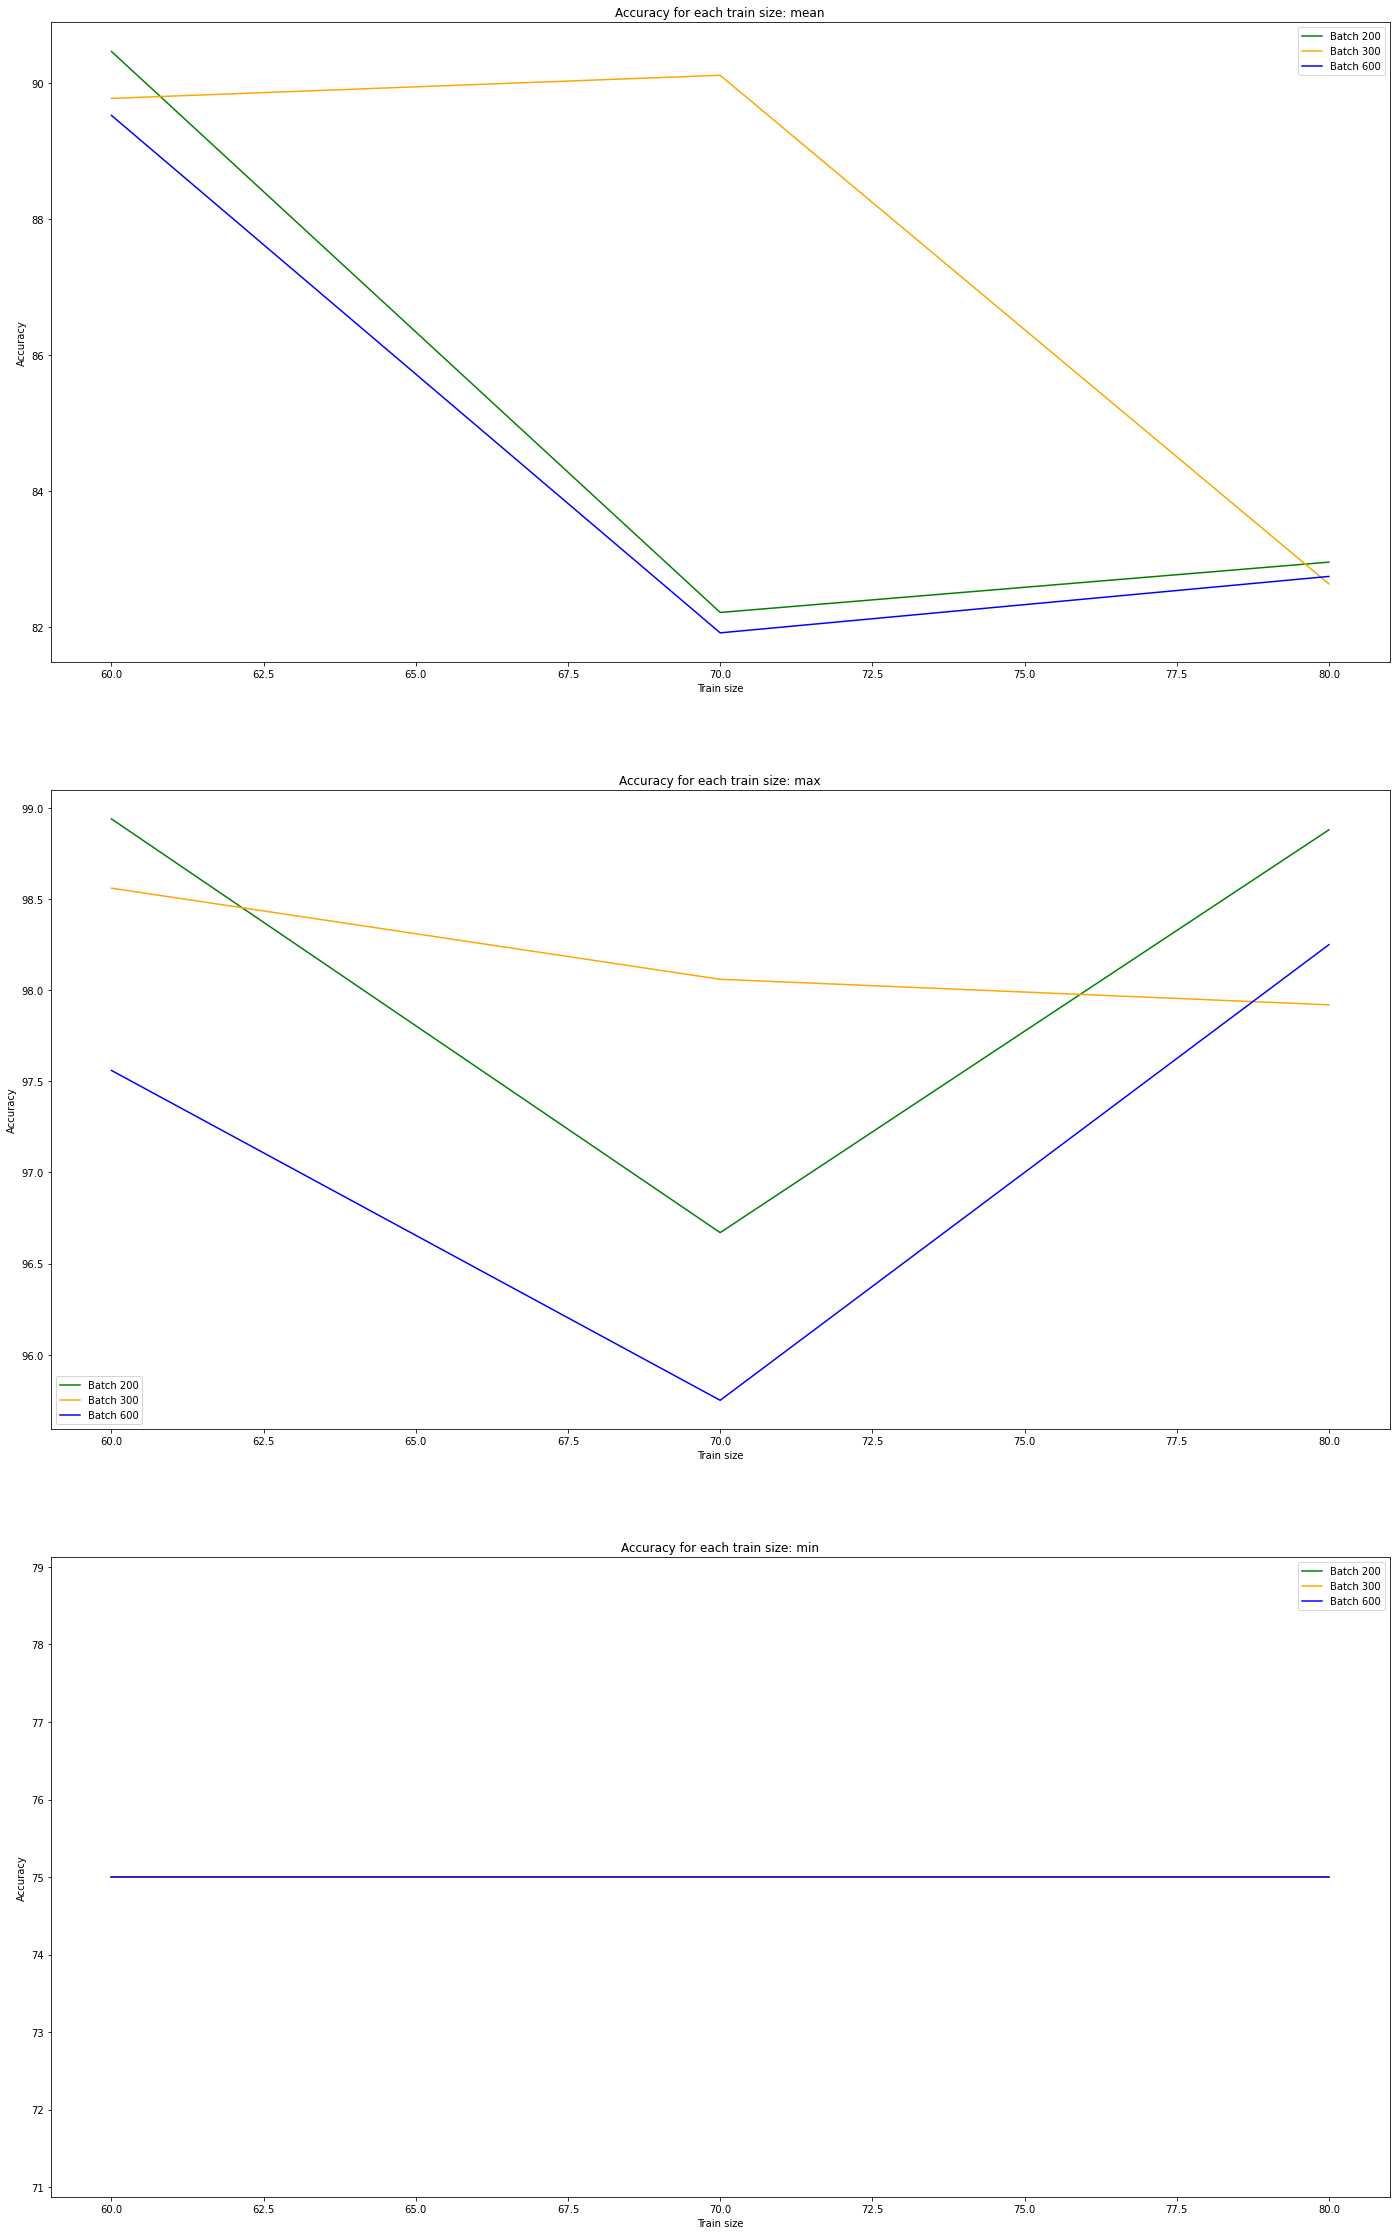

In [58]:
# Display for each train size their performances
# Create figure:
labels = ['mean','max','min']
fig, axes = plt.subplots(3,1,figsize=(24,40))

# Define size of fig
# plot mean max min of acc
for index in range(3):
    c = 0
    for batch in batches:
        test_df2.loc[test_df2['Batchs'] == batch].plot(ax = axes[index], x='Train_size', 
                                                    y='Acc_'+labels[index],color = col[c], 
                                                        label = 'Batch {0}'.format(batch))
        axes[index].set_ylabel('Accuracy')
        axes[index].set_xlabel('Train size')
        axes[index].set_title('Accuracy for each train size: {0}'.format(labels[index]))
        c+=1
    # Draw for Accurancies
    #test_df.plot(ax = axes[index,0], x='Train_size', y='Acc_'+labels[index], marker = 'o',color = 'r', label = '{}'.format(labels[index]))
    #test_df.plot(ax = axes[0,1], x='Train_size', y='Timer_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))
    #test_df.plot(ax = axes[1,0], x='Train_size', y='Mem_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))
    #test_df.plot(ax = axes[1,1], x='Train_size', y='Loss_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))


# Notes
It's interesting to see that the best accuracy (mean,min and max !)  was found when we have less datas to train (only 60%)

In [59]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.0f}, y={:.1f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.15)
    kw = dict(xycoords='data',textcoords="axes fraction",
             bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.70,0.70), **kw)
    
#annot_max(epoches,epoch_df['Acc_min'], ax)
#annot_max(epoches,epoch_df['Acc_mean'], ax)

acc_mean
acc_max
acc_min


'\n# Plot interesting information:\nmax_mean = epoch_df.iloc[epoch_df[\'Acc_mean\'].argmax()][\'Acc_mean\']\nmax_max = epoch_df.iloc[epoch_df[\'Acc_max\'].argmax()][\'Acc_max\']\nmax_min = epoch_df.iloc[epoch_df[\'Acc_min\'].argmax()][\'Acc_min\']\nmin_mean = epoch_df.iloc[epoch_df[\'Acc_mean\'].argmin()][\'Acc_mean\']\nmin_max = epoch_df.iloc[epoch_df[\'Acc_max\'].argmin()][\'Acc_max\']\nmin_min = epoch_df.iloc[epoch_df[\'Acc_min\'].argmin()][\'Acc_min\']\n\nax = axes[0][0]\n\n# Mean\nax.axhline(y=max_mean, color =\'r\', linestyle = \'--\',linewidth = 0.9)\nax.text(0,max_mean, "{:.2f}".format(max_mean), color="red")\nax.axhline(y=min_mean, color =\'r\', linestyle = \'--\',linewidth = 0.9)\nax.text(0,min_mean, "{:.2f}".format(max_mean), color="red")\n\n# Max\nax.axhline(y=max_max, color =\'r\', linestyle = \'--\',linewidth = 0.9)\nax.text(0,max_max, "{:.2f}".format(max_max), color="red")\nax.axhline(y=min_max, color =\'r\', linestyle = \'--\',linewidth = 0.9)\nax.text(0,min_max, "{:.2f

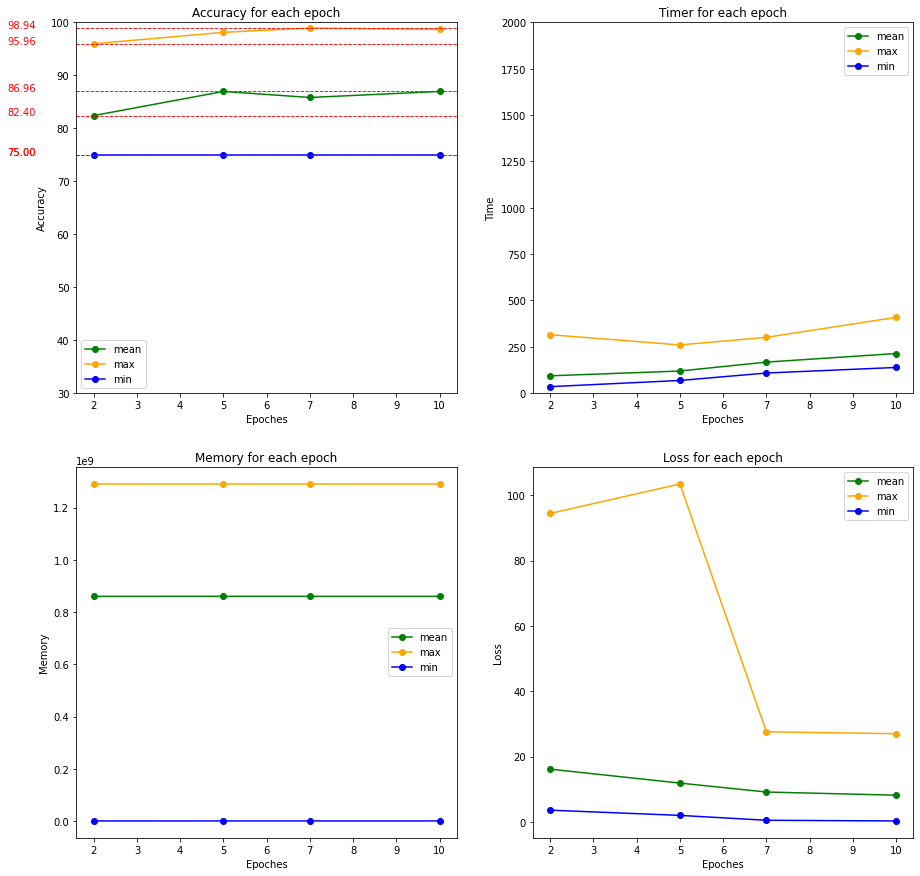

In [60]:
# Display each epoch performance with batch take the best accuracy 
# Create figure:
labels = ['mean','max','min']
fig, axes = plt.subplots(2,2,figsize=(15,15))
# Define xlabels and ylabels
# Accurancies
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_xlabel('Epoches')
axes[0,0].set_title('Accuracy for each epoch')
axes[0,0].set_ylim([30,100])


# Timer
axes[0,1].set_title('Timer for each epoch')
axes[0,1].set_ylabel('Time')
axes[0,1].set_xlabel('Epoches')
# limit y axis
axes[0,1].set_ylim([0,2000])
# Memory
axes[1,0].set_title('Memory for each epoch')
axes[1,0].set_ylabel('Memory')
axes[1,0].set_xlabel('Epoches')

# Loss
axes[1,1].set_title('Loss for each epoch')
axes[1,1].set_ylabel('Loss')
axes[1,1].set_xlabel('Epoches')


ok = True
# Define size of fig
# plot mean max min of acc
for index in range(3):
    epoch_df.plot(ax = axes[0,0], x='Epoches', y='Acc_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))
    epoch_df.plot(ax = axes[0,1], x='Epoches', y='Timer_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))
    epoch_df.plot(ax = axes[1,0], x='Epoches', y='Mem_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))
    epoch_df.plot(ax = axes[1,1], x='Epoches', y='Loss_'+labels[index], marker = 'o',color = col[index], label = '{}'.format(labels[index]))
    
    
    ax = axes[0][0]
    # Plot interesting informations for Accuracy:
    print('acc_'+labels[index])
    maxi = epoch_df.iloc[epoch_df['Acc_'+labels[index]].argmax()]['Acc_'+labels[index]]
    mini = epoch_df.iloc[epoch_df['Acc_'+labels[index]].argmin()]['Acc_'+labels[index]]
    ax.axhline(y=maxi, color ='r', linestyle = '--',linewidth = 0.9)
    ax.text(0,maxi, "{:.2f}".format(maxi), color="red")
    ax.axhline(y=mini, color ='r', linestyle = '--',linewidth = 0.9)
    ax.text(0,mini, "{:.2f}".format(mini), color="red")

'''
# Plot interesting information:
max_mean = epoch_df.iloc[epoch_df['Acc_mean'].argmax()]['Acc_mean']
max_max = epoch_df.iloc[epoch_df['Acc_max'].argmax()]['Acc_max']
max_min = epoch_df.iloc[epoch_df['Acc_min'].argmax()]['Acc_min']
min_mean = epoch_df.iloc[epoch_df['Acc_mean'].argmin()]['Acc_mean']
min_max = epoch_df.iloc[epoch_df['Acc_max'].argmin()]['Acc_max']
min_min = epoch_df.iloc[epoch_df['Acc_min'].argmin()]['Acc_min']

ax = axes[0][0]

# Mean
ax.axhline(y=max_mean, color ='r', linestyle = '--',linewidth = 0.9)
ax.text(0,max_mean, "{:.2f}".format(max_mean), color="red")
ax.axhline(y=min_mean, color ='r', linestyle = '--',linewidth = 0.9)
ax.text(0,min_mean, "{:.2f}".format(max_mean), color="red")

# Max
ax.axhline(y=max_max, color ='r', linestyle = '--',linewidth = 0.9)
ax.text(0,max_max, "{:.2f}".format(max_max), color="red")
ax.axhline(y=min_max, color ='r', linestyle = '--',linewidth = 0.9)
ax.text(0,min_max, "{:.2f}".format(max_mean), color="red")

# Min
ax.axhline(y=max_min, color ='r', linestyle = '--',linewidth = 0.9)
ax.text(0,max_min, "{:.2f}".format(max_min), color="red")
ax.axhline(y=min_min, color ='r', linestyle = '--',linewidth = 0.9)
ax.text(0,min_min, "{:.2f}".format(max_mean), color="red")
'''